# Customer Churn Prediction With Decision Tree Model

You are working as a data scientist for a telecommunications company. The company is experiencing a high churn rate among its customers, and management is keen on reducing this churn by identifying the most vulnerable customers and offering targeted retention strategies.

The company's customer data includes various features such as Monthly Charges, Tenure, Contract Type, and a Churn indicator that specifies whether a customer has churned (1) or not (0). You are tasked with developing a decision tree model that can predict whether a customer is likely to churn based on these features.

To help management understand the customer churn dynamics, you are expected to:

1. Data Understanding:

  * Review the dataset to understand the key features affecting customer churn.
  * Check the balance of the Churn feature and identify missing values and their percentage.

2. Exploratory Data Analysis (EDA):

  * Generate descriptive statistics and visualizations to understand the distribution of key numerical features such as Monthly Charges and Tenure.
  * Analyze the relationship between these features and Churn, and visualize patterns in the data using box plots.
  * Explore the correlation between numerical features and the target variable.

3. Data Preprocessing:

   * Handle any missing data for numerical features like Monthly Charges and Tenure using appropriate imputation techniques (mean imputation).
   * Prepare the data for modeling by splitting it into training and testing sets.
4. Model Building:

  * Train a Decision Tree Classifier using the training data.
  * Evaluate the model's initial performance by calculating key metrics: Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.
5. Hyperparameter Tuning:

   * Perform GridSearchCV to fine-tune the decision tree model’s hyperparameters (such as max_depth, min_samples_split, min_samples_leaf, and criterion) and improve the model’s performance.
   * Evaluate the tuned model on the test set and compare the performance metrics with the initial model.
6. Decision Tree Interpretation:

  * Visualize the decision tree to interpret how the model makes decisions based on key features like Monthly Charges and Tenure.

7. Decision Boundary Visualization:

   * Train a simpler decision tree model using only two features (Monthly Charges and Tenure) and visualize the decision boundaries that separate customers likely to churn from those who are not.

In [1]:
print("Hello, Begin Your Data Journey")


Hello, Begin Your Data Journey


In [2]:
!pip install matplotlib
!pip install sklearn
!pip install statsmodels
!pip install seaborn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import json
import warnings
warnings.filterwarnings("ignore")

jupyter_notebook_dataset = os.getenv("dataset_url", "https://d3dyfaf3iutrxo.cloudfront.net/general/upload/3af2adf8847e4f3c89a95c77fc2c6d9d.csv")
df_complex = pd.read_csv(jupyter_notebook_dataset)


In [4]:
df_complex


,Monthly_Charges,Tenure,Contract_Type,Churn
0,58.09,20.0,2,0.0
1,101.66,37.0,2,1.0
2,NaN,46.0,2,1.0
3,55.61,44.0,3,0.0
4,115.01,2.0,2,1.0
...,...,...,...,...
995,61.04,31.0,1,1.0
996,100.94,21.0,1,1.0
997,NaN,33.0,3,0.0
998,90.10,10.0,2,1.0


In [5]:
# Display the first few rows of the dataset to understand its structure
df_complex.head()


,Monthly_Charges,Tenure,Contract_Type,Churn
0,58.09,20.0,2,0.0
1,101.66,37.0,2,1.0
2,NaN,46.0,2,1.0
3,55.61,44.0,3,0.0
4,115.01,2.0,2,1.0


In [6]:
# Display the shape of the dataset (rows, columns)
df_complex.shape


(1000, 4)

In [7]:
# Generate descriptive statistics to understand the range, mean, and other info of each feature
df_complex.describe()


,Monthly_Charges,Tenure,Contract_Type,Churn
count,960.000000,970.000000,1000.000000,1000.000000
mean,68.947458,26.372165,1.901000,0.517000
std,29.309956,15.195752,0.713939,0.499961
min,20.460000,1.000000,1.000000,0.000000
25%,43.192500,15.000000,1.000000,0.000000
50%,69.480000,25.000000,2.000000,1.000000
75%,94.555000,35.000000,2.000000,1.000000
max,119.970000,59.000000,3.000000,1.000000


In [8]:
# 1. Understand the data: Checking for missing values and class balance
df_complex.isnull().any()


Monthly_Charges     True
Tenure              True
Contract_Type      False
Churn              False
dtype: bool

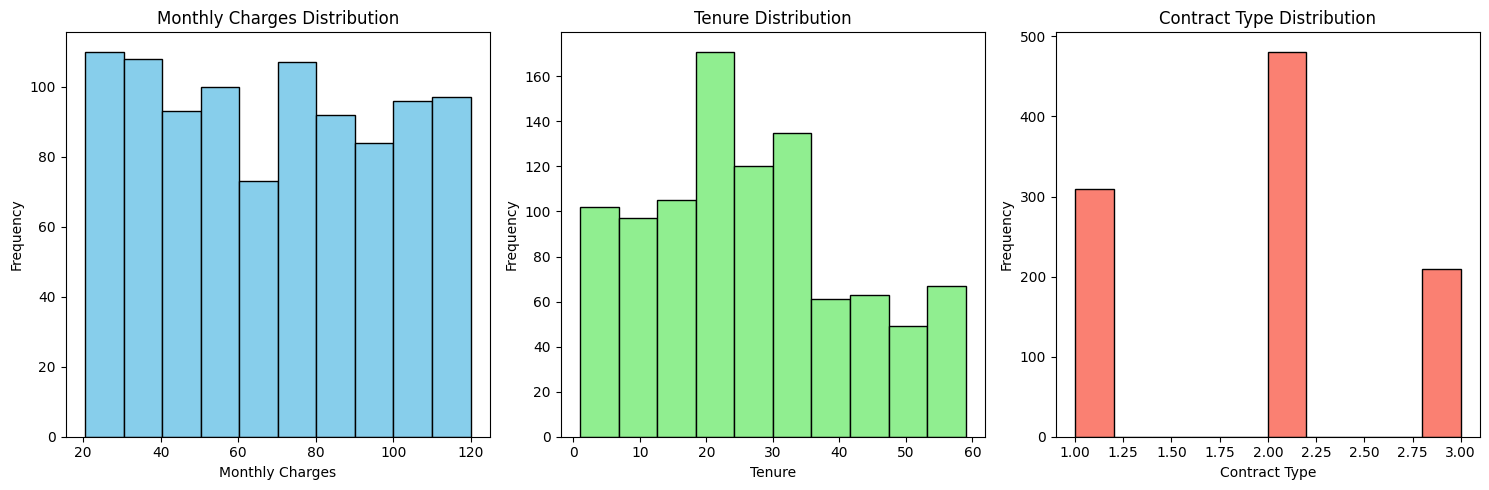

In [9]:
# Visualizations for EDA

# Histograms for continuous features (Monthly_Charges, Tenure, Contract_Type)

# Visualizations
plt.figure(figsize=(15, 5))

# Histogram for Age
plt.subplot(1, 3, 1)
plt.hist(df_complex["Monthly_Charges"].dropna(), bins=10, color="skyblue", edgecolor="black")
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")

# Histogram for Income
plt.subplot(1, 3, 2)
plt.hist(df_complex["Tenure"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Tenure Distribution")
plt.xlabel("Tenure")
plt.ylabel("Frequency")

# Histogram for Credit Score
plt.subplot(1, 3, 3)
plt.hist(df_complex["Contract_Type"], bins=10, color="salmon", edgecolor="black")
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



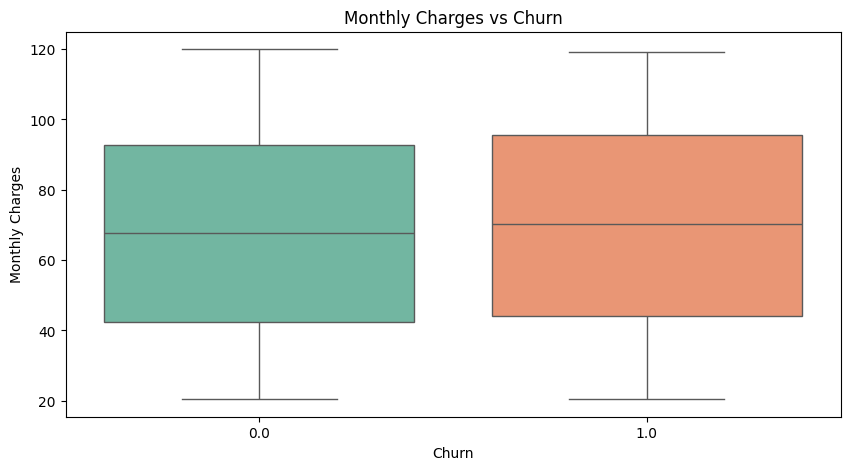

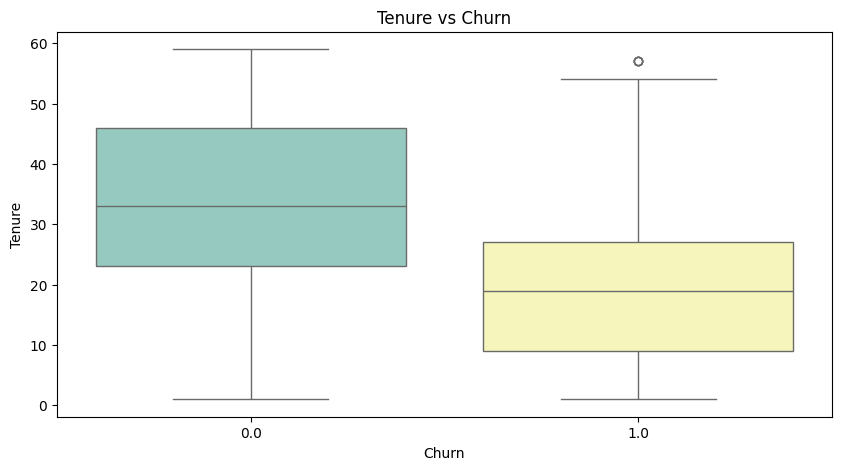

In [10]:
# Visualize the relationship between each feature and Churn

# Monthly Charges vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Monthly_Charges', data=df_complex, palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Tenure vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Tenure', data=df_complex, palette='Set3')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()



ValueError: Must pass 2-d input. shape=()

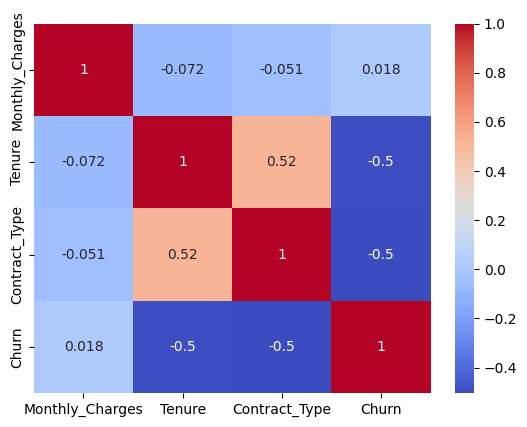

<Figure size 800x600 with 0 Axes>

In [12]:
# Correlation heatmap for numerical features
correlation_matrix = sns.heatmap(df_complex.corr(),annot=True, cmap='coolwarm')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# Count the number of occurrences of each class in the target feature 'Churn'
df_complex['Churn'].value_counts()


Churn
1.0    517
0.0    483
Name: count, dtype: int64

In [14]:
df_complex.isnull().sum()

Monthly_Charges    40
Tenure             30
Contract_Type       0
Churn               0
dtype: int64

In [15]:
# 3. Data Preprocessing: Handle missing values
# df_complex['Monthly_Charges'].fillna(df_complex['Monthly_Charges'].mean(), inplace=True)

# df_complex['Tenure'].fillna(df_complex['Tenure'].mean(), inplace=True)

# Handle missing values for numerical features by filling with the mean

df_complex['Monthly_Charges'].fillna(df_complex['Monthly_Charges'].mean(), inplace=True)

df_complex['Tenure'].fillna(df_complex['Tenure'].mean(), inplace=True)


# Separate features and target

X = df_complex.drop(columns='Churn')

y = df_complex['Churn']




In [16]:
# Handle missing values for numerical features by filling with the mean
df_complex.isnull().sum()


Monthly_Charges    0
Tenure             0
Contract_Type      0
Churn              0
dtype: int64

In [17]:
# 4. Split the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 



In [18]:
# 5. Train Decision Tree Model
# Initialize and train the decision tree classifier on the training data
dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train) 



DecisionTreeClassifier()

In [19]:
# Make predictions on the test set
y_pred = dtree.predict(X_test)


In [20]:
# Calculate and display the accuracy score and store it in a variable 'accuracy_complex'
def get_accuracy():
    ans = accuracy_score(y_test, y_pred)
    return ans# replace with actual accuracy


In [21]:
accuracy = get_accuracy()
accuracy


0.645

In [22]:
# 6. Model evaluation: Calculate precision, recall, F1-score, and confusion matrix
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred) 
F1_score = f1_score(y_test, y_pred) 
cm = confusion_matrix(y_test, y_pred) 


In [23]:
# 7. Hyperparameter tuning with GridSearchCV
# Perform grid search to find the best combination of hyperparameters for the decision tree

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 


In [24]:
k = 5
cv = KFold(n_splits=k, shuffle = True)
params = {'max_depth': [3,5,7,10],
         'min_samples_leaf': [1,2,3,4,5],
         'criterion': ['gini', 'entropy']}

DTGS = DecisionTreeClassifier()
gcv = GridSearchCV(DTGS, param_grid=params, cv = cv)
gcv.fit(X_train,y_train)
gcv.best_params_


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [25]:
# Get the best model and hyperparameters
gcv.best_params_


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [26]:
# Make predictions with the best model

model = gcv.best_estimator_


In [27]:
y_pred_cv = model.predict(X_test)



In [28]:
# Calculate and display the accuracy score and store it in a variable 'best_accuracy_complex'
def get_accuracy():  
    ans = accuracy_score(y_test, y_pred_cv) 
    return ans # replace with actual accuracy


In [29]:
accuracy = get_accuracy()
accuracy


0.775

In [30]:
# Evaluate the tuned model precision, recall, F1-score, and confusion matrix
precision_gs = precision_score(y_test, y_pred_cv) 
recall_gs = recall_score(y_test, y_pred_cv) 
F1_score = f1_score(y_test, y_pred_cv)
cm = confusion_matrix(y_test, y_pred_cv)


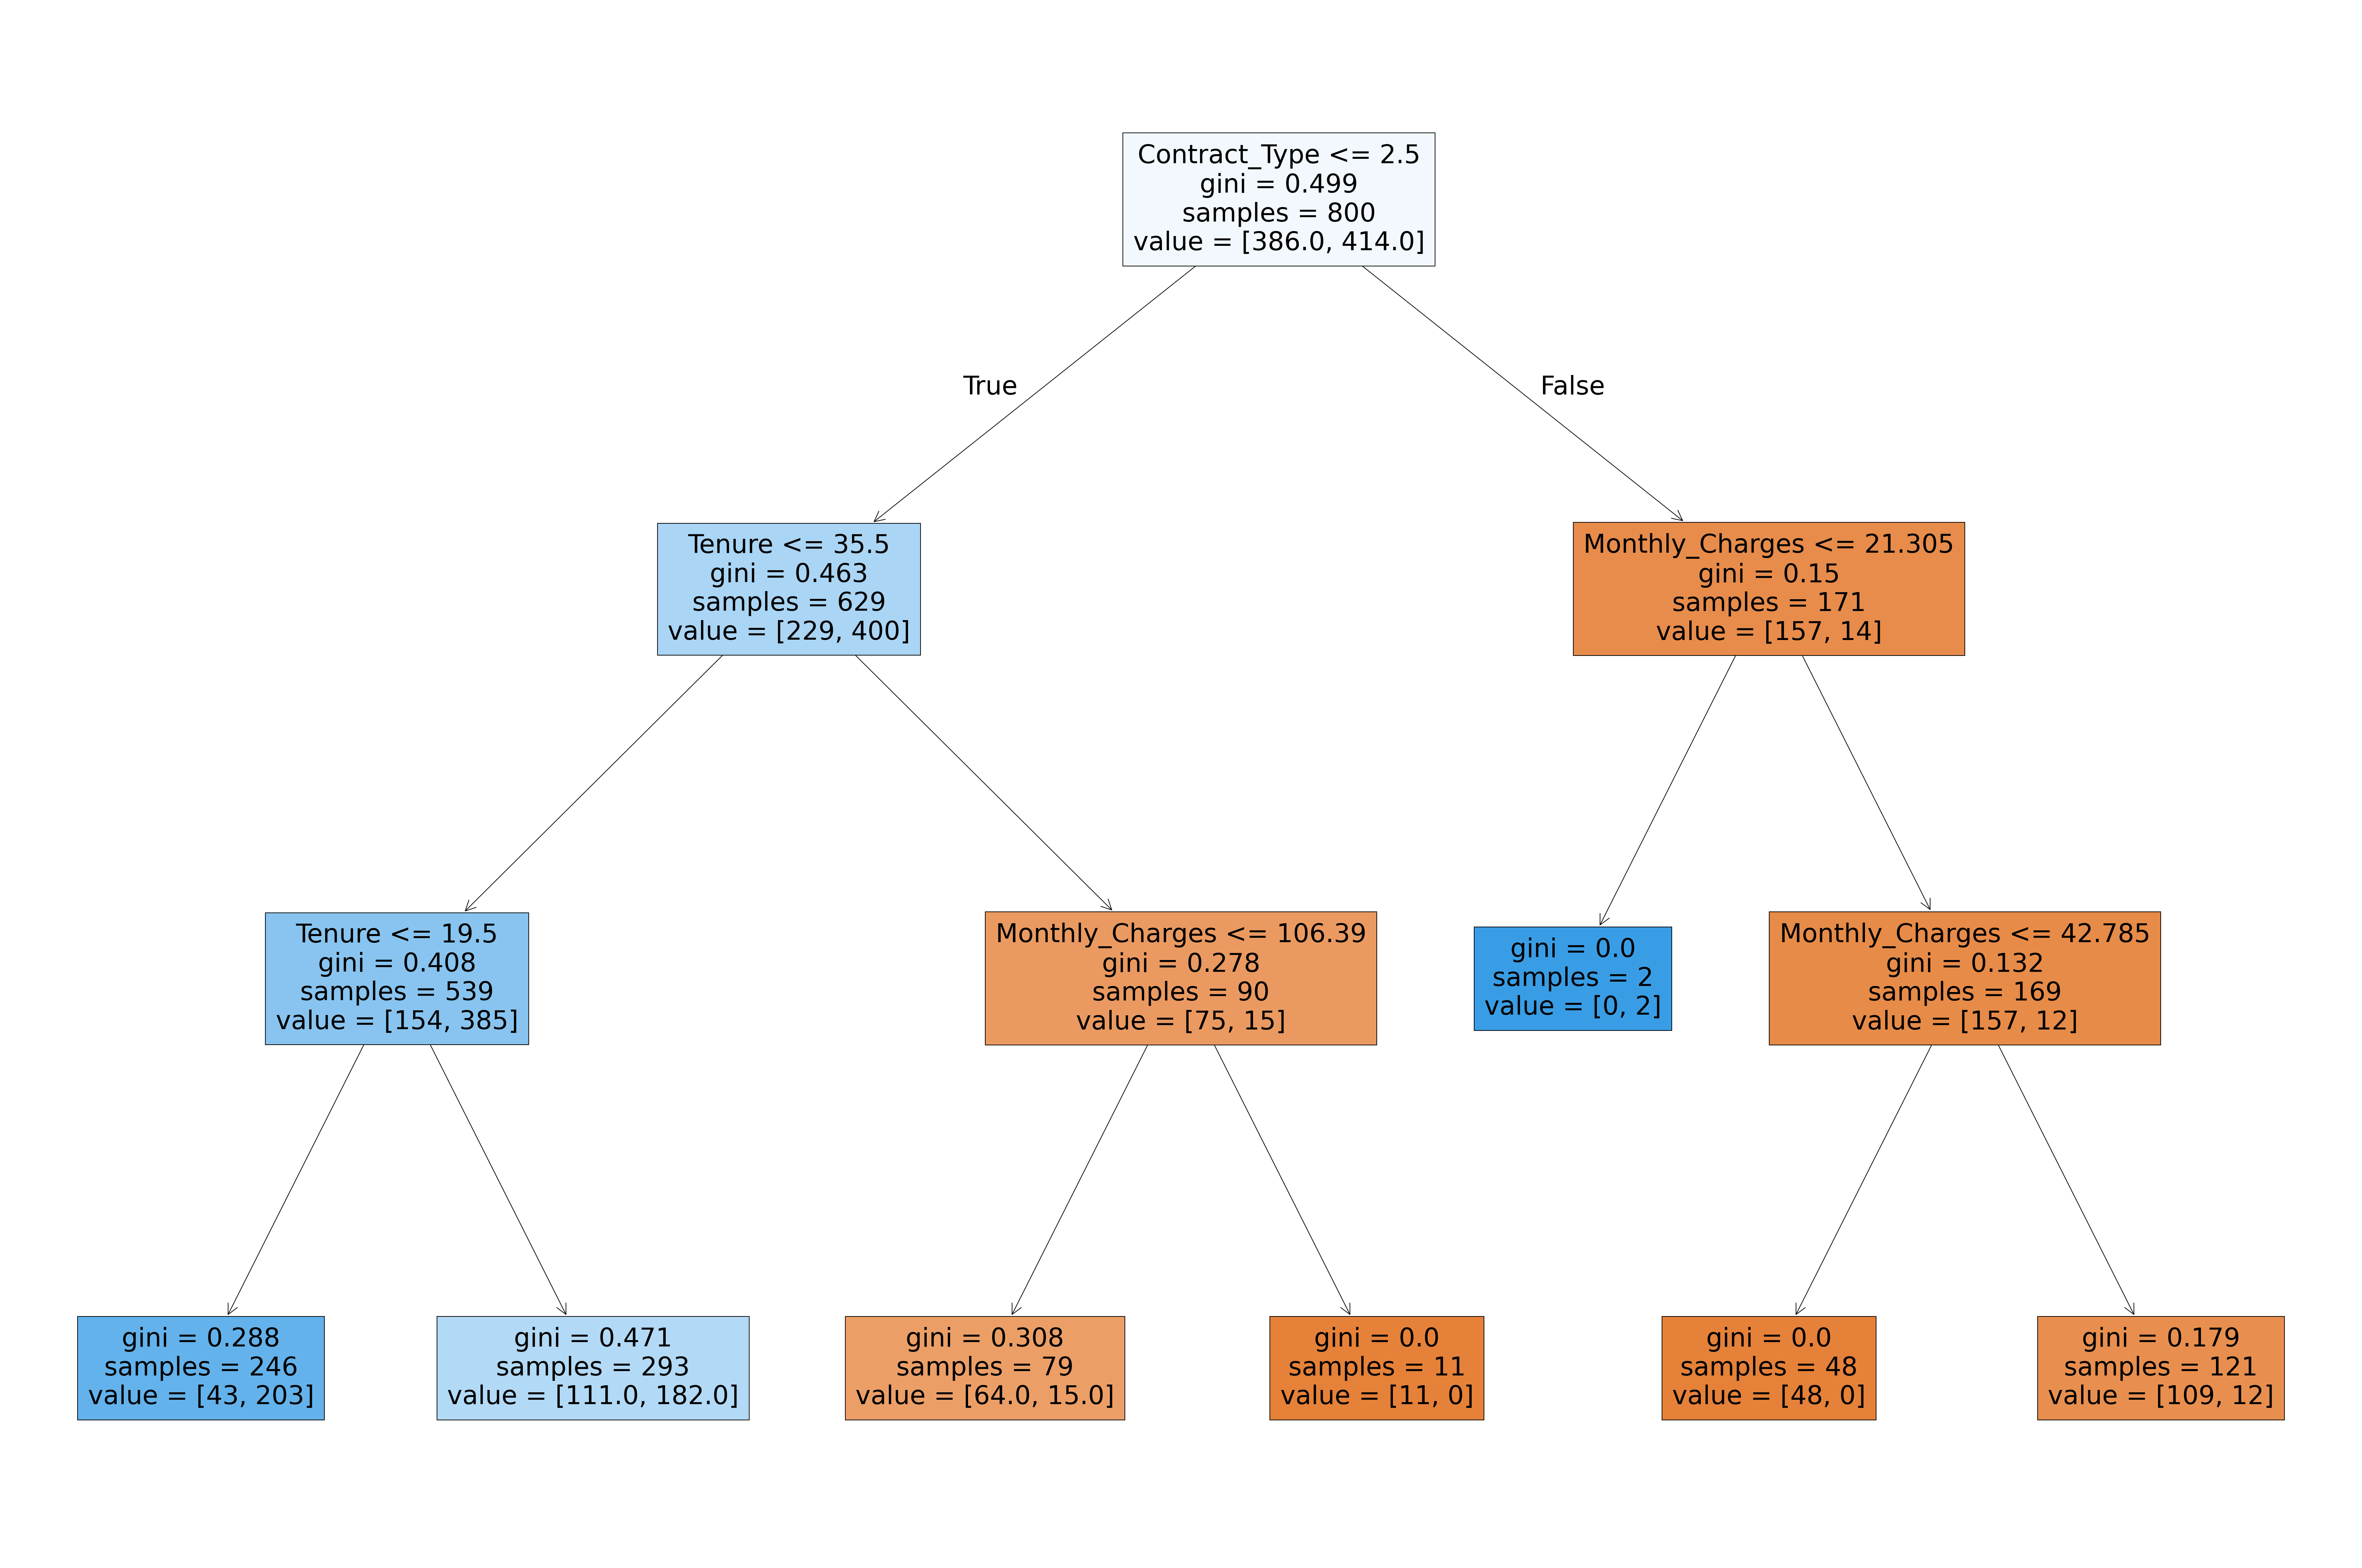

In [31]:
# 8. Visualize the decision tree for the best model
plt.figure(figsize=(60,40),dpi=150)
plot_tree(model, filled = True, feature_names = X.columns);
